In [195]:
%%capture
%pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
warnings.filterwarnings('ignore')


Exploración del dataset

In [114]:
file = pd.ExcelFile('./homicidios.xlsx')
df = pd.read_excel(file, 'HECHOS')


In [115]:
df.head()


,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [116]:
df.shape


(696, 21)

In [117]:
df.columns.to_list()


['ID',
 'N_VICTIMAS',
 'FECHA',
 'AAAA',
 'MM',
 'DD',
 'HORA',
 'HH',
 'LUGAR_DEL_HECHO',
 'TIPO_DE_CALLE',
 'Calle',
 'Altura',
 'Cruce',
 'Dirección Normalizada',
 'COMUNA',
 'XY (CABA)',
 'pos x',
 'pos y',
 'PARTICIPANTES',
 'VICTIMA',
 'ACUSADO']

In [118]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
N_VICTIMAS,696.0,1.030172,0.179393,1.0,1.0,1.0,1.0,3.0
AAAA,696.0,2018.188218,1.683754,2016.0,2017.0,2018.0,2020.0,2021.0
MM,696.0,6.692529,3.571309,1.0,4.0,7.0,10.0,12.0
DD,696.0,15.936782,8.639646,1.0,9.0,16.0,23.0,31.0
Altura,129.0,3336.635659,3060.641793,30.0,1359.0,2551.0,4500.0,16080.0
COMUNA,696.0,7.425287,4.387050,0.0,4.0,8.0,11.0,15.0


In [119]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Limpieza y preparación del dataset<br>
Primero se observan la cantidad de elementos nulos que tenemos en cada columna<br>
En segundo lugar se eliminarán los elementos duplicados<br>
Por ultimo se convertiran los datos a su tipo correspondiente

In [120]:
df.isnull().sum()


ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

Se decide eliminar las columnas 'Altura' y 'Cruce' ya que poseen gran cantidad de elementos faltantes y no se consideran de alta relevancia para el análisis

In [121]:
df.drop('Altura', axis=1, inplace=True)
df.drop('Cruce', axis=1, inplace=True)


In [122]:
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
691    False
692    False
693    False
694    False
695    False
Length: 696, dtype: bool

Eliminamos las filas que contengan datos faltantes

In [123]:
df = df[~df.eq("SD").any(axis=1)]


In [124]:
df.shape


(668, 19)

In [125]:
df['PARTICIPANTES'] = df['PARTICIPANTES'].astype('category')
df['VICTIMA'] = df['VICTIMA'].astype('category')
df['ACUSADO'] = df['ACUSADO'].astype('category')
df['TIPO_DE_CALLE'] = df['TIPO_DE_CALLE'].astype('category')
df['HH'] = df['HH'].astype('int')
df['AAAA'] = df['AAAA'].astype('int')
df['MM'] = df['MM'].astype('int')
df['DD'] = df['DD'].astype('int')
df['LUGAR_DEL_HECHO'] = df['LUGAR_DEL_HECHO'].astype('string')
df['Calle'] = df['Calle'].astype('string')
df['Dirección Normalizada'] = df['Dirección Normalizada'].astype('string')
df['COMUNA'] = df['COMUNA'].astype('category')
df['pos x'] = pd.to_numeric(df['pos x'], errors='coerce')
df['pos y'] = pd.to_numeric(df['pos y'], errors='coerce')


In [126]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 695
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     668 non-null    object        
 1   N_VICTIMAS             668 non-null    int64         
 2   FECHA                  668 non-null    datetime64[ns]
 3   AAAA                   668 non-null    int64         
 4   MM                     668 non-null    int64         
 5   DD                     668 non-null    int64         
 6   HORA                   668 non-null    object        
 7   HH                     668 non-null    int64         
 8   LUGAR_DEL_HECHO        668 non-null    string        
 9   TIPO_DE_CALLE          668 non-null    category      
 10  Calle                  668 non-null    string        
 11  Dirección Normalizada  662 non-null    string        
 12  COMUNA                 668 non-null    category      
 13  XY (C

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,"PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.","PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,SAN JUAN AV.,"SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,27 DE FEBRERO AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.444513,-34.684759,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO


Análisis y visualización de datos

Para el analisis y visualización de datos correspondiente, se definieron las siguientes funciones para ser utilizadas en el analisis

In [149]:
def grafico_de_barras(columna, color, rot):
    plt.figure(figsize=(10, 6))
    df[columna].value_counts().plot(kind='bar', color=color)
    plt.title(f'Gráfico de barras de {columna}',)
    plt.xlabel(f'Número de {columna}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=rot)
    plt.show()


In [128]:
def grafico_de_tortas(columna, colores):
    plt.figure(figsize=(10, 6))
    df[columna].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colores)
    plt.title(f'Gráfico de tortas de {columna}')
    plt.show()


In [134]:
def analisis_temporal(df,fecha,letra, color):
    df = df.reset_index()
    df[fecha] = pd.to_datetime(df['FECHA'])
    df.set_index('FECHA', inplace=True)
    incidentes_temporales = df.resample(letra).size() #Reagrupo por mes
    plt.figure(figsize=(12, 6))
    incidentes_temporales.plot(title='Cantidad de incidentes a lo largo del tiempo', color=color)
    plt.xlabel('Fecha')
    plt.ylabel('Número de Incidentes')
    plt.show()


In [189]:
def relacion_entre_dos_col(col1, col2):
    tabla = pd.crosstab(df[col1], df[col2])

    plt.figure(figsize=(12, 8))
    sns.heatmap(tabla, annot=True, cmap='YlGnBu', fmt="d", linewidths=0.5)
    plt.title(f'Relación entre {col1} y {col2}')
    plt.show()


Comenzando con la visualización de datos, se analizó la distribución del numero de victimas por incidente

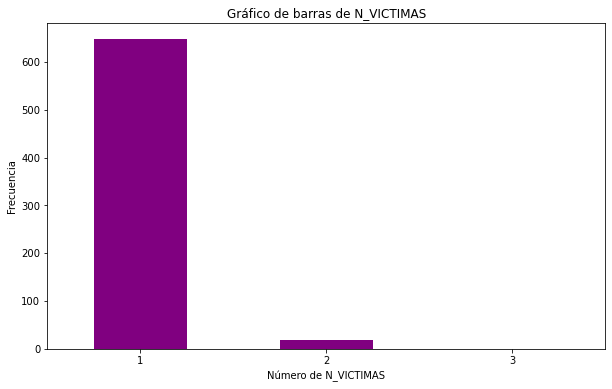

1    648
2     19
3      1
Name: N_VICTIMAS, dtype: int64

In [197]:
grafico_de_barras('N_VICTIMAS', 'purple', 1)
df['N_VICTIMAS'].value_counts()


Se continuó con un analisis temporal de cuando ocurriendo los incidentes: por mes, por año, por dia de la semana y por hora

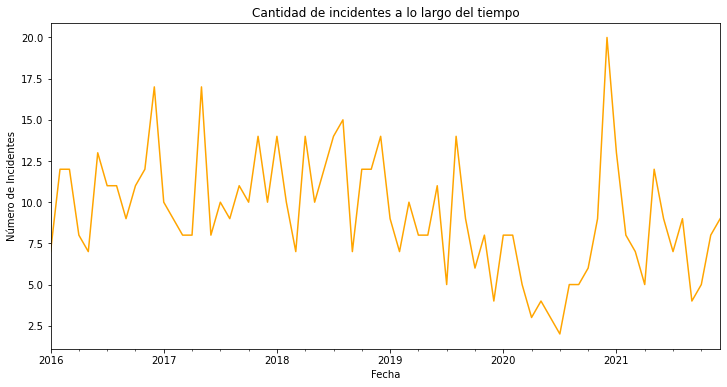

In [135]:
analisis_temporal(df, "FECHA_MES", "M", "orange")


Se puede observar que se tiene pico abrupto negativo en el 2020 - COVID, tambien se puede ver en el grafico por año

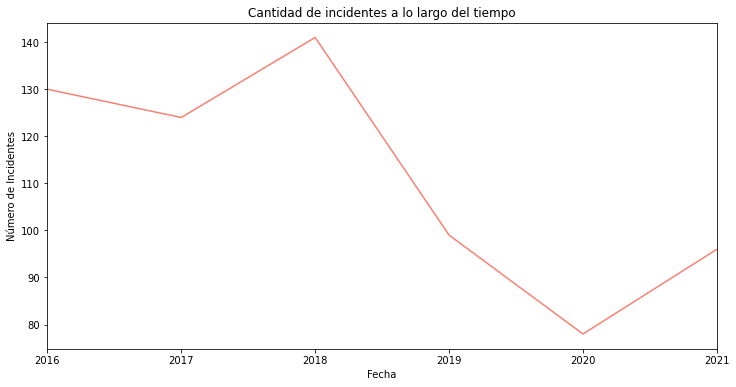

In [136]:
analisis_temporal(df, "FECHA_ANO", "Y", "salmon")


Analizando los incidentes por dia de la semana se tiene el siguiente resultado

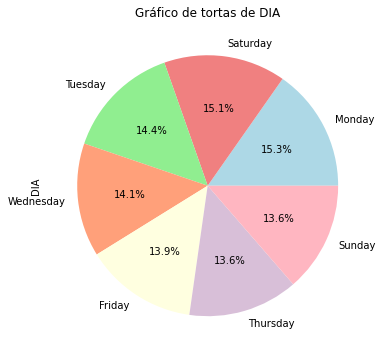

In [144]:
df['DIA'] = df['FECHA'].dt.day_name()
colores = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightyellow','thistle', 'lightpink']

grafico_de_tortas('DIA', colores)


No hay un dia de la semana que muestre una mayor cantidad de accidentes significativo

Analizando los horarios a los cuales ocurren los incidentes (se agruparon los horarios en 4 grupos horarios)

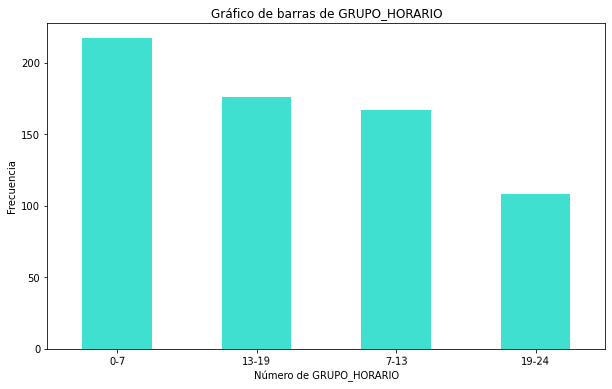

0-7      32.485030
13-19    26.347305
7-13     25.000000
19-24    16.167665
Name: GRUPO_HORARIO, dtype: float64

In [200]:
df['GRUPO_HORARIO'] = pd.cut(df['HH'],
                             bins=[0, 7, 13, 19, 24],
                             labels=['0-7', '7-13', '13-19', '19-24'],
                             include_lowest=True)

grafico_de_barras('GRUPO_HORARIO', 'turquoise', 1)
df['GRUPO_HORARIO'].value_counts() / len(df) * 100


Se continuo con un analisis de las caracteristicas de los incidentes

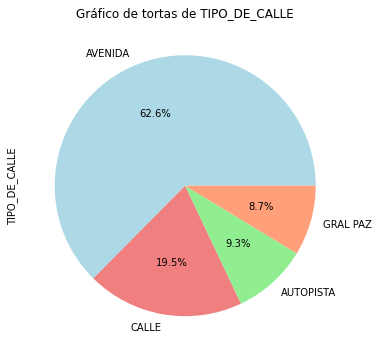

In [162]:
#Tipo de calle
colores = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']
grafico_de_tortas('TIPO_DE_CALLE', colores)


La mayoría de los incidentes ocurren en Avenidas

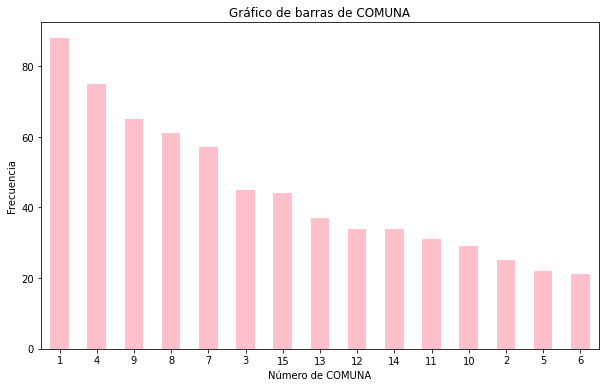

In [163]:
#Comuna
grafico_de_barras('COMUNA', 'pink', 1)


Con el objetivo de plasmar cuales son las comunas que tienen mayor frecuencia de incidentes, se procede a visualizar una imagen de las comunas de CABA. Las comunas con mayor frecuencia de incidentes son la 1 (Puerto Madero, Retiro, Montserrat, Constitución), 4 (Parque Patricios y Barracas) y 9 (Mataderos)

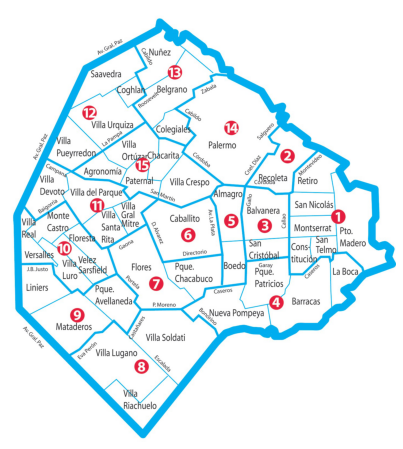

In [196]:
ruta_imagen = './mapa-comunas3.jpeg'
imagen = mpimg.imread(ruta_imagen)
plt.figure(figsize=(10, 8))
plt.imshow(imagen)
plt.axis('off')
plt.show()


Continuando con el analisis de frecuencia de los incidentes según las columnas se tiene

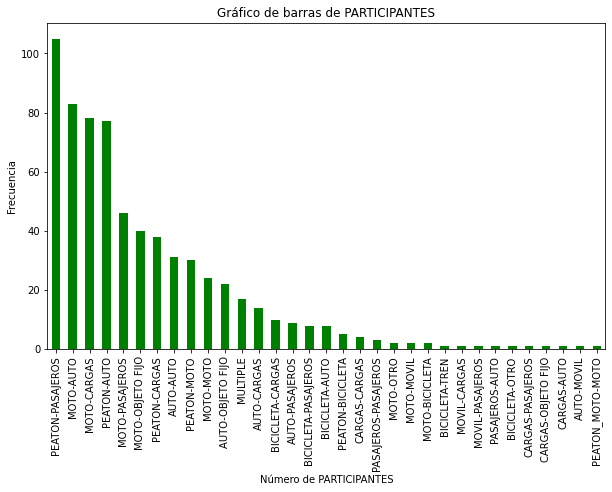

In [164]:
#Participantes
grafico_de_barras('PARTICIPANTES', 'green', 'vertical')


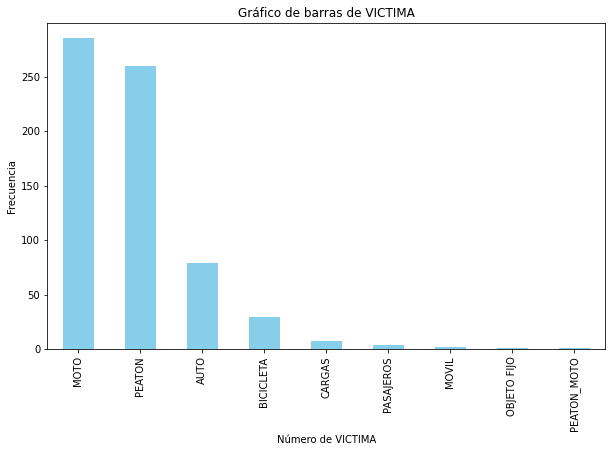

In [166]:
# Victima
grafico_de_barras('VICTIMA', 'skyblue', 'vertical')


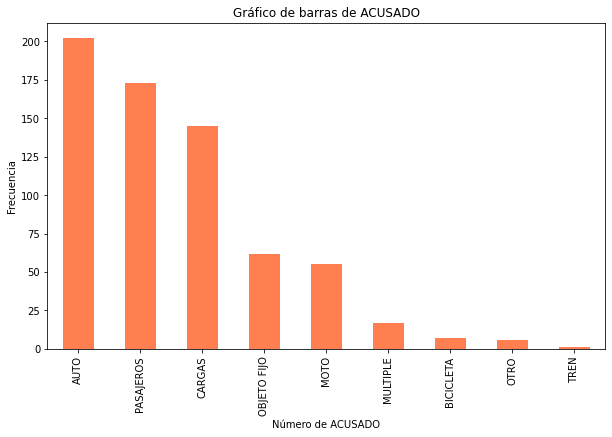

In [167]:
#Acusado
grafico_de_barras('ACUSADO', 'coral', 'vertical')


A continuación, se realizó un analisis de la relación entre dos variables del dataset

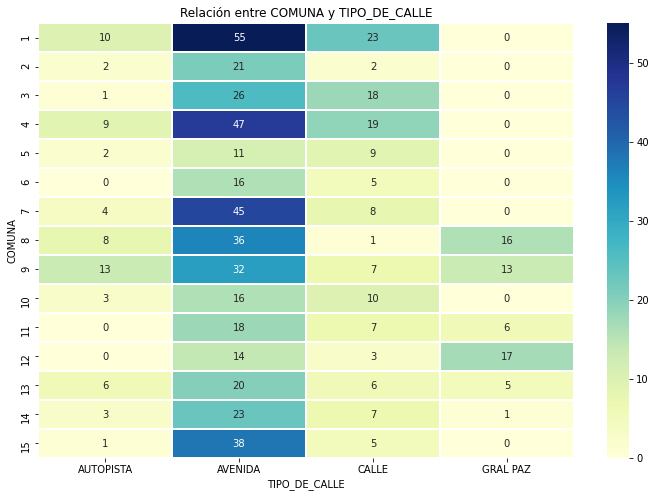

In [177]:
relacion_entre_dos_col('COMUNA', 'TIPO_DE_CALLE')


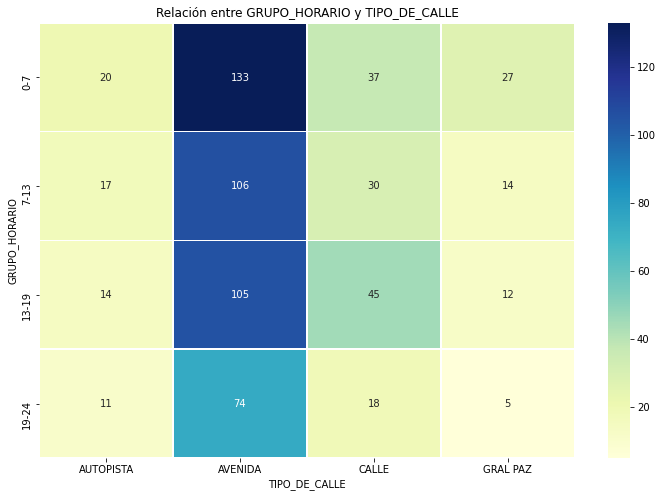

In [179]:
relacion_entre_dos_col('GRUPO_HORARIO', 'TIPO_DE_CALLE')


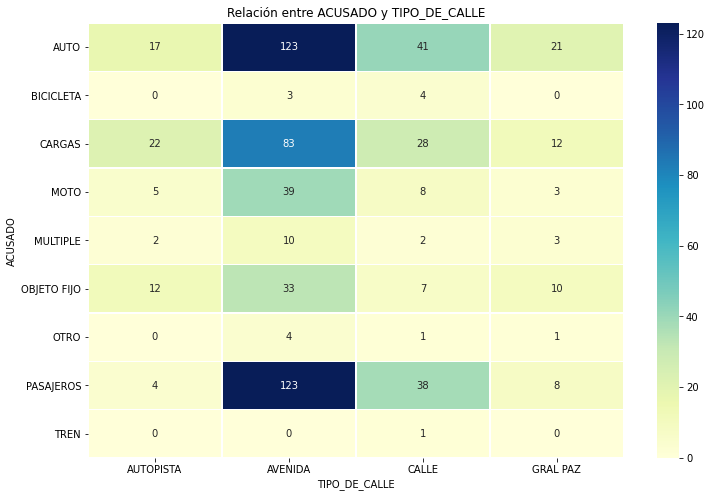

In [183]:
relacion_entre_dos_col('ACUSADO', 'TIPO_DE_CALLE')


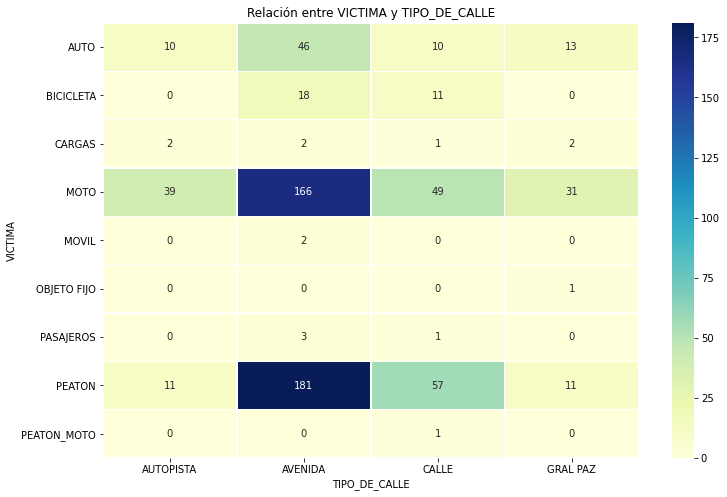

In [184]:
relacion_entre_dos_col('VICTIMA', 'TIPO_DE_CALLE')


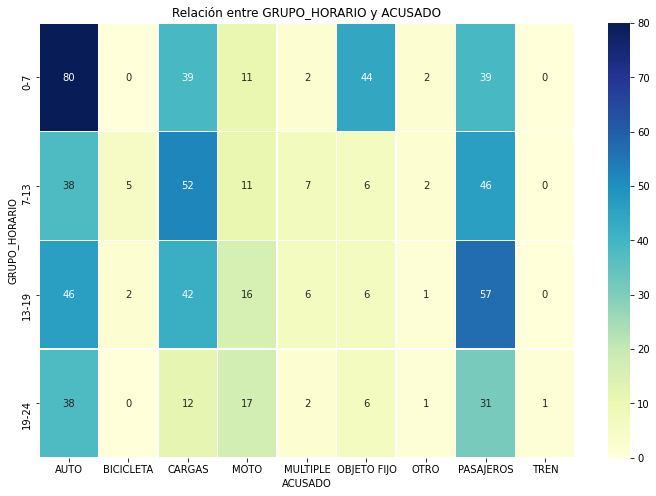

In [180]:
relacion_entre_dos_col('GRUPO_HORARIO', 'ACUSADO')


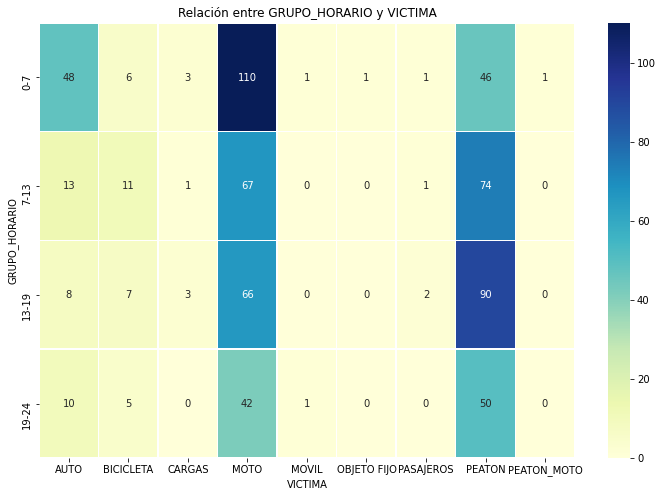

In [185]:
relacion_entre_dos_col('GRUPO_HORARIO', 'VICTIMA')


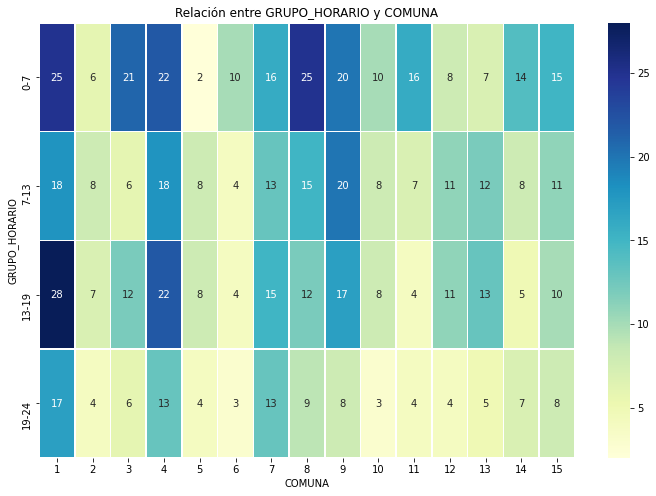

In [188]:
relacion_entre_dos_col('GRUPO_HORARIO', 'COMUNA')


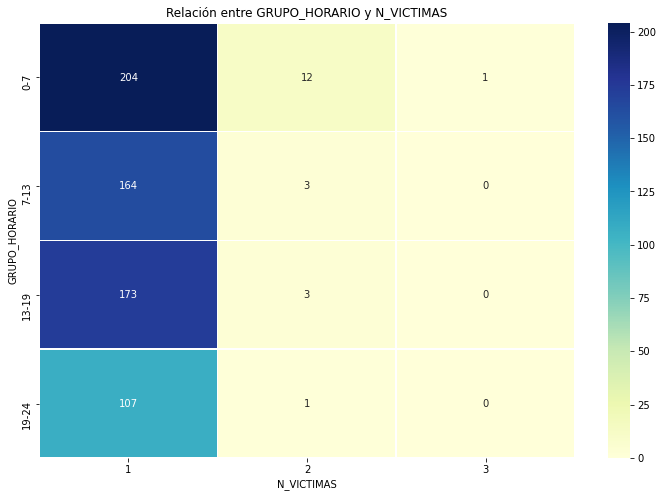

In [187]:
relacion_entre_dos_col('GRUPO_HORARIO', 'N_VICTIMAS')
